# <font color='#FFE15D'>**Week 14: SVM ⚞**</font>

## **🔸 Imports**

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **🔸 Simplified SVM (from Scratch)**

### Data

(998, 2) (998,)


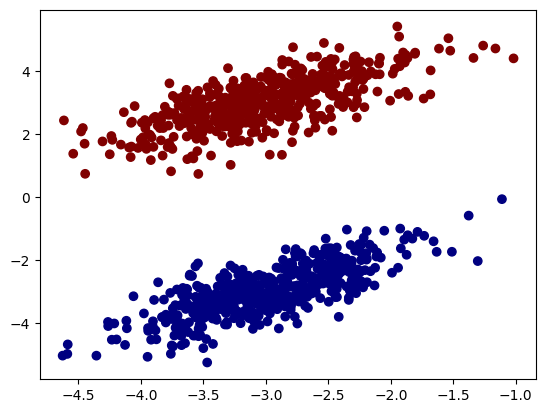

In [207]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

flags = np.ones((1000), dtype=np.bool_)
flags[[154, 770]] = False
X = X[flags, :]
y = y[flags]
print(X.shape, y.shape)
y = np.where(y==0, -1, y)[:, None]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### Model

In [208]:
class SVM:
    def __init__(self, in_features, n_iter=1000, eta=0.01, c=1.0, random_state=42):
        np.random.seed(random_state)
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        # self.w = np.zeros((in_features, 1))
        # self.b = 0
        self.n_iter = n_iter
        self.eta = eta
        self.c = c
        self.loss_hist = []

    def fit(self, X, y):
        # train loop
        for i in range(self.n_iter):
            y_hat = self.predict(X)
            # false predictions
            mask = np.squeeze((1 - y * y_hat) > 0)
            if mask.sum() == 0:
                print(i, "break!")
                break
            loss = self._loss(y, y_hat, mask)
            grad_w, grad_b = self._grad(X, y, y_hat, mask)
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss)

    def predict(self, x):
        return x @ self.w + self.b

    def score(self, X, y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)

    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat < t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc

    def _loss(self, y, y_hat, mask):
        y_mask = y[mask]
        y_hat_mask = y_hat[mask]
        return np.maximum(0, 1 - y_mask * y_hat_mask).mean()

    def _grad(self, x, y, y_hat, mask):
        x_mask = x[mask]
        y_mask = y[mask]
        # y_hat_mask = y_hat[mask]
        grad_w = (-y_mask * x_mask).mean(axis=0).reshape(self.w.shape) + self.c * self.w
        grad_b = (-y_mask).mean(axis=0)
        return grad_w, grad_b

### Train

In [209]:
model = SVM(in_features=2, n_iter=2000, eta=0.01, c=1., random_state=4)
model.fit(X, y)

607 break!


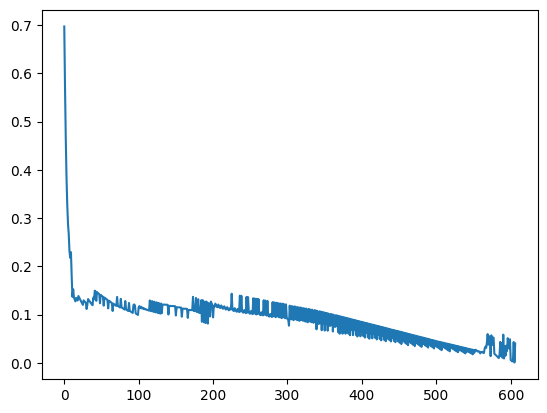

In [210]:
plt.plot(model.loss_hist)

In [211]:
model.loss_hist[-1]

0.03994503993269135

### Evaluation

In [212]:
model.score(X, y)

1.0

### Decision Boundary

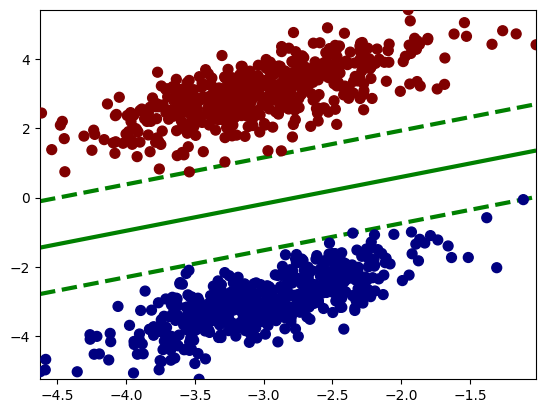

In [213]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

### `C`

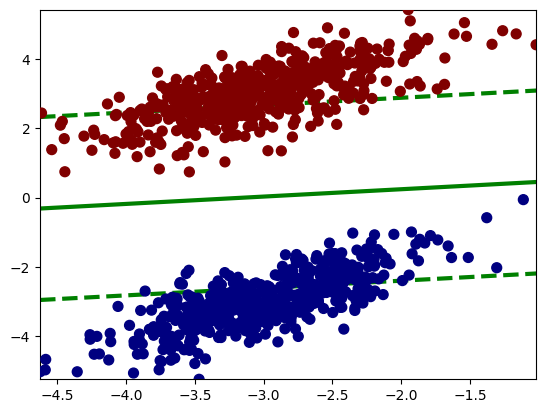

In [214]:
model = SVM(in_features=2, n_iter=2000, eta=0.01, c=5.5, random_state=2)
model.fit(X, y)

n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)